In [25]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd

In [26]:
df1 = pd.read_csv('data.csv', delimiter=',')
df1.dataframeName = 'data.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 50 rows and 12 columns


In [27]:
df1 = df1.rename(columns={"tension_strenght": "tensile_strength"})

In [29]:
df1.head(5)

,layer_height,wall_thickness,infill_density,infill_pattern,nozzle_temperature,bed_temperature,print_speed,material,fan_speed,roughness,tensile_strength,elongation
0,0.02,8,90,grid,220,60,40,abs,0,25,18,1.2
1,0.02,7,90,honeycomb,225,65,40,abs,25,32,16,1.4
2,0.02,1,80,grid,230,70,40,abs,50,40,8,0.8
3,0.02,4,70,honeycomb,240,75,40,abs,75,68,10,0.5
4,0.02,6,90,grid,250,80,40,abs,100,92,5,0.7


In [30]:
#In this data set, ABS and PLA assigned 0 and 1 values for materials (abs = 0, pla = 1)
df1.material = [0 if each=='abs' else 1 for each in df1.material]

#In this data set, grid and honeycomb assigned 0 and 1 values for infill_pattern (grid = 0, honeycomb = 1)
df1.infill_pattern = [0 if each=='grid' else 1 for each in df1.infill_pattern]

In [31]:
df1.layer_height = df1.layer_height*100
df1.elongation = df1.elongation*100

In [32]:
df1.head()

,layer_height,wall_thickness,infill_density,infill_pattern,nozzle_temperature,bed_temperature,print_speed,material,fan_speed,roughness,tensile_strength,elongation
0,2.0,8,90,0,220,60,40,0,0,25,18,120.0
1,2.0,7,90,1,225,65,40,0,25,32,16,140.0
2,2.0,1,80,0,230,70,40,0,50,40,8,80.0
3,2.0,4,70,1,240,75,40,0,75,68,10,50.0
4,2.0,6,90,0,250,80,40,0,100,92,5,70.0


In [33]:
# Histogram of column data
def plotHistogram(df, nHistogramShown, nHistogramPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nHistRow = int((nCol + nHistogramPerRow - 1) / nHistogramPerRow)
    plt.figure(num=None, figsize=(6*nHistogramPerRow, 8*nHistRow), dpi=80, facecolor='w', edgecolor='k')
    for i in range(min(nCol, nHistogramShown)):
        plt.subplot(nHistRow, nHistogramPerRow, i+1)
        df.iloc[:,i].hist()
        plt.ylabel('counts')
        plt.xticks(rotation=90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad=1.0, w_pad=1.0, h_pad=1.0)
    plt.show()

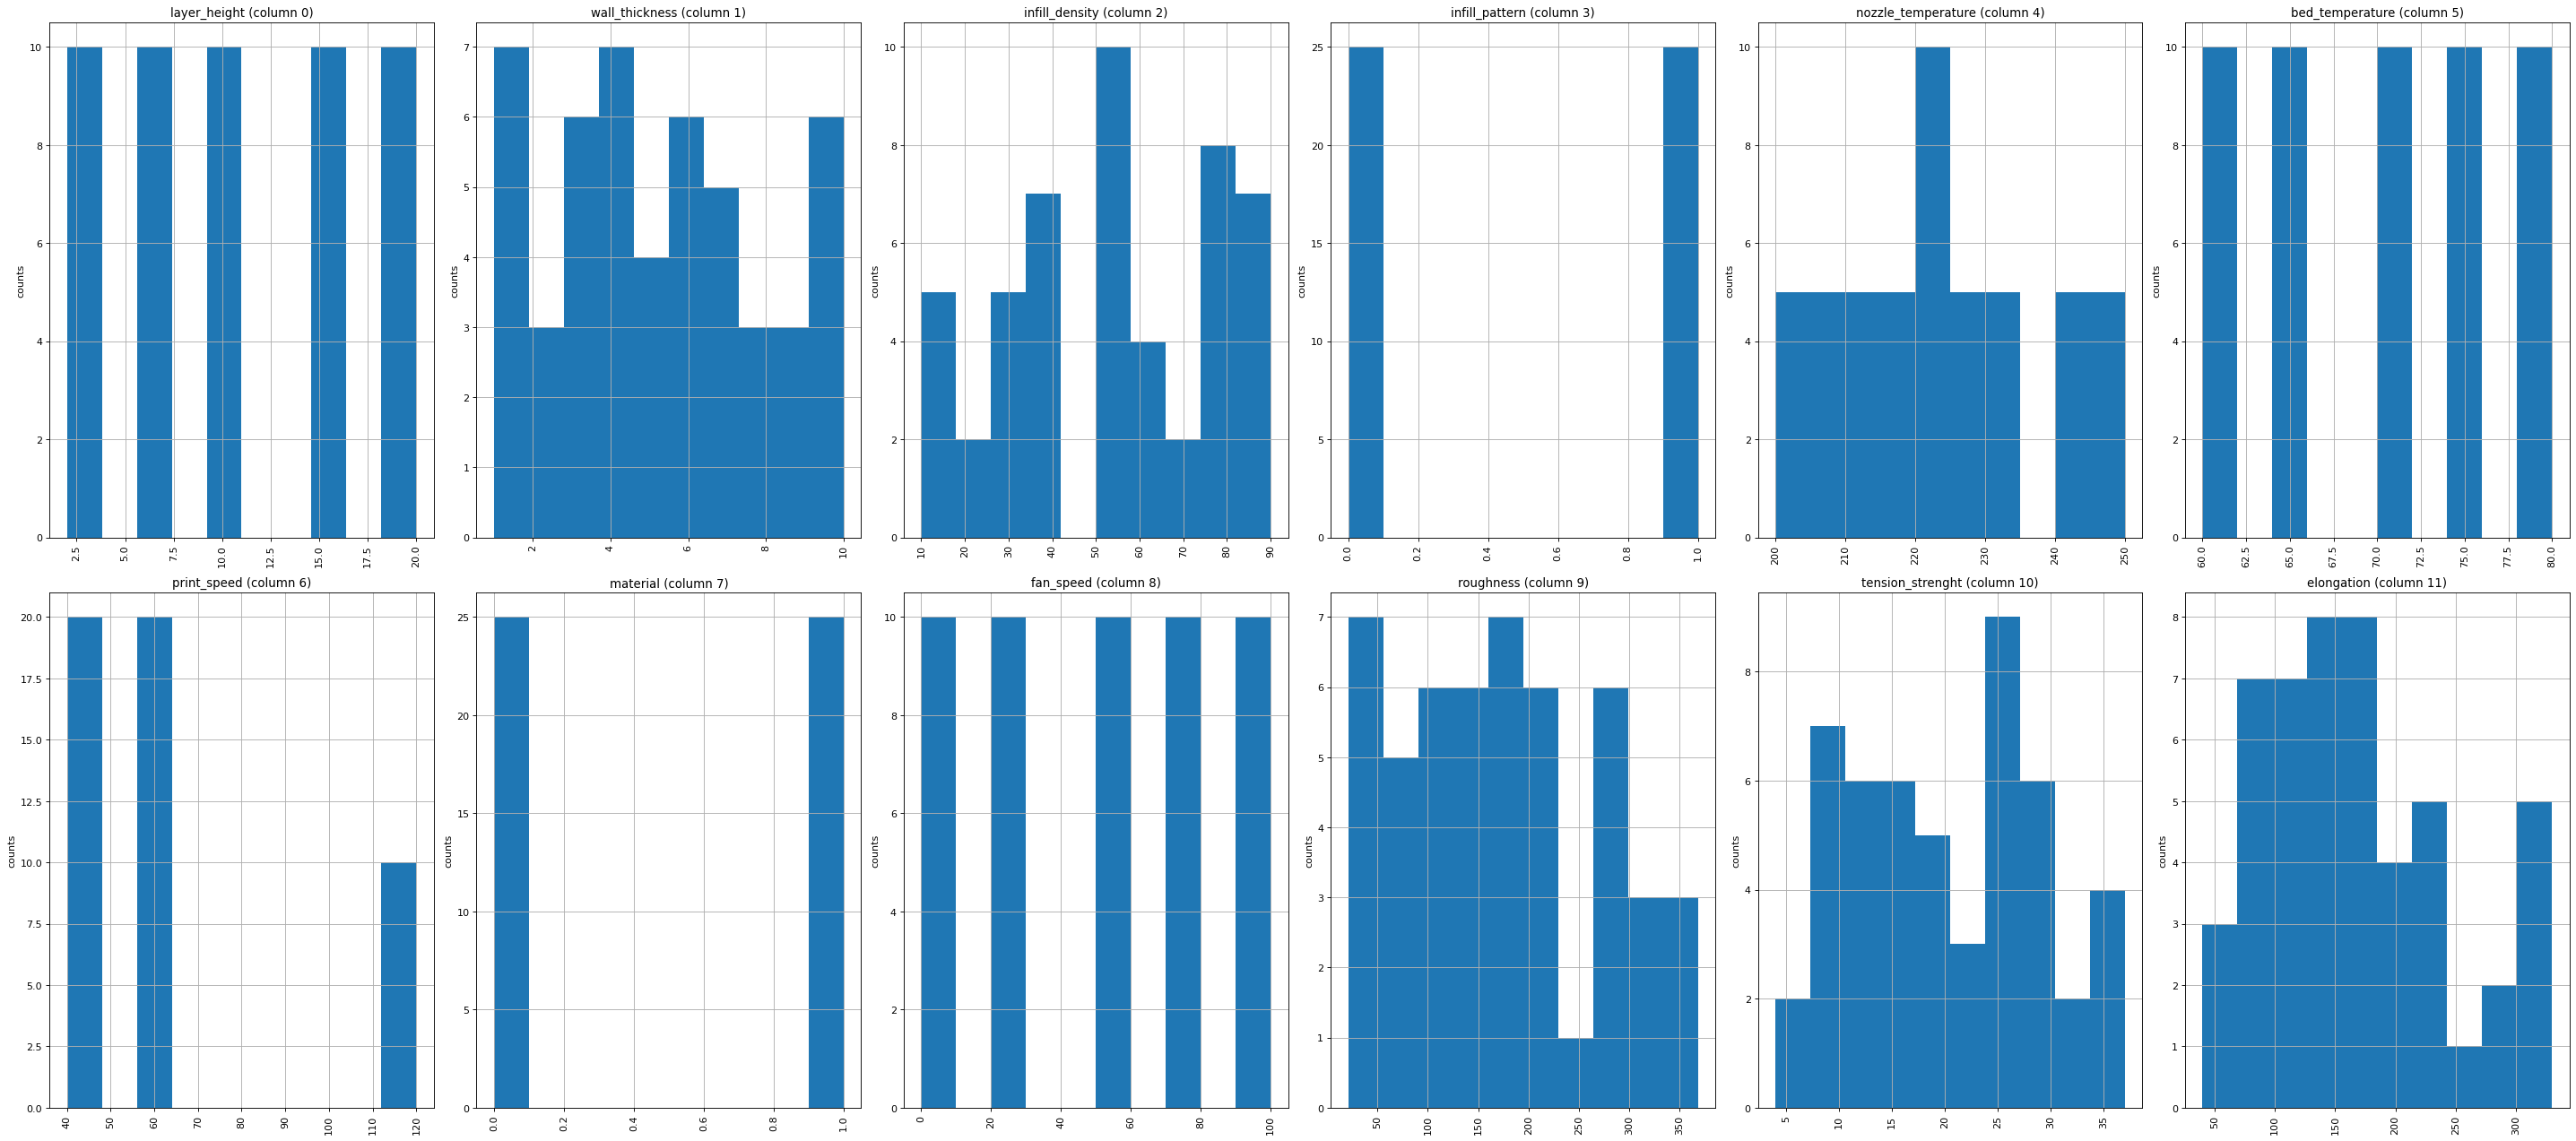

In [8]:
plotHistogram(df1, 12, 6)

In [34]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

C:\Users\Amir\AppData\Local\Temp/ipykernel_12872/102845399.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  df = df.dropna('columns')


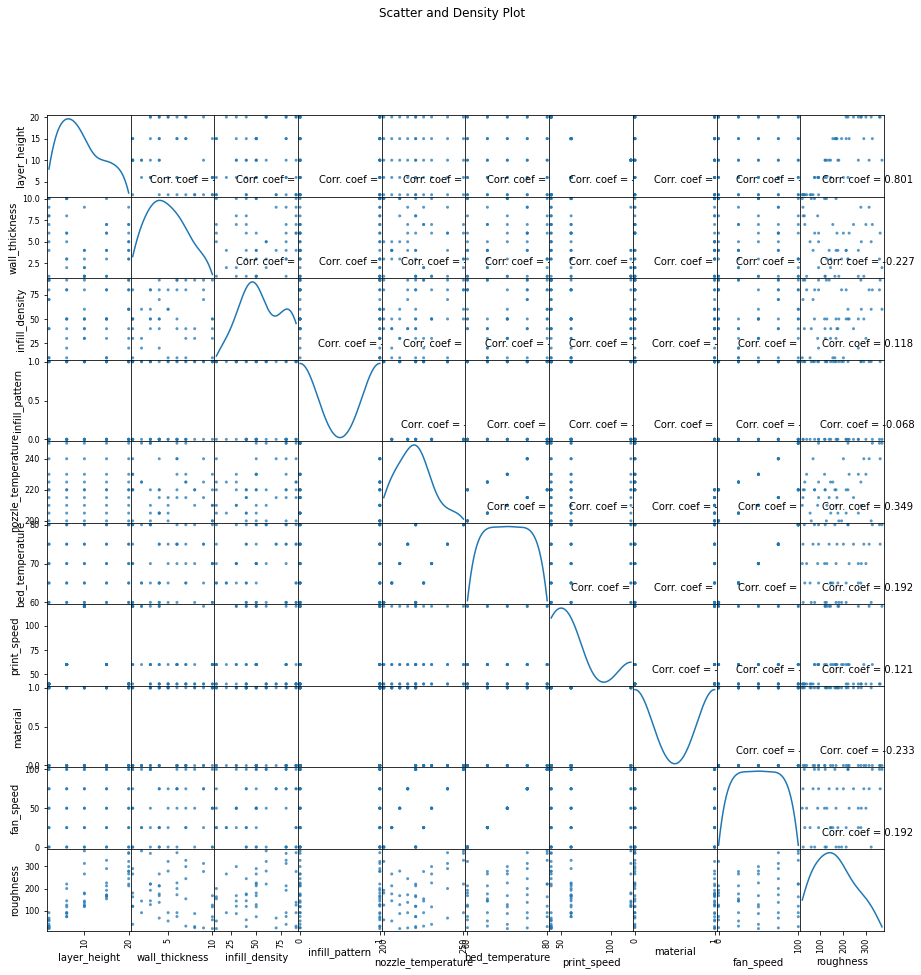

In [37]:
plotScatterMatrix(df1, 15, 10)

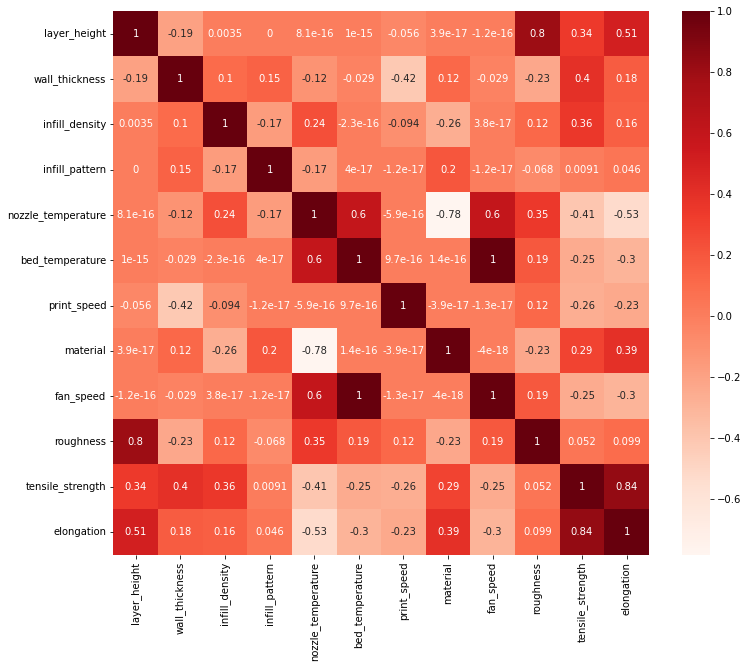

In [38]:
import seaborn as sns
plt.figure(figsize=(12,10))
cor = df1.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds) #Using Pearson Correlation
plt.show()

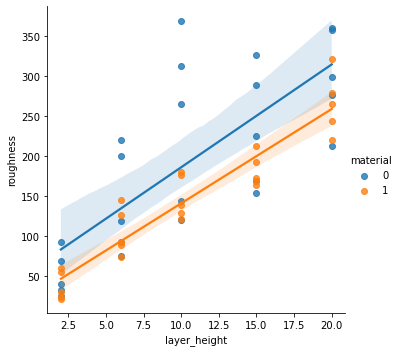

In [12]:
sns.lmplot(data=df1, x='layer_height', y='roughness', hue='material');

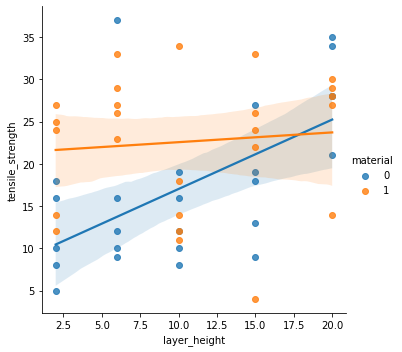

In [40]:
sns.lmplot(data=df1, x='layer_height', y='tensile_strength', hue='material');

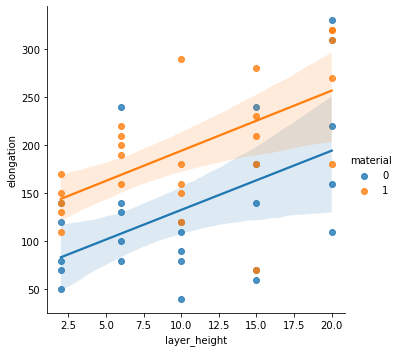

In [39]:
sns.lmplot(data=df1, x='layer_height', y='elongation', hue='material');

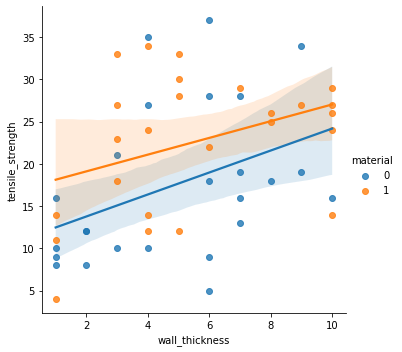

In [42]:
sns.lmplot(data=df1, x='wall_thickness', y='tensile_strength', hue='material');

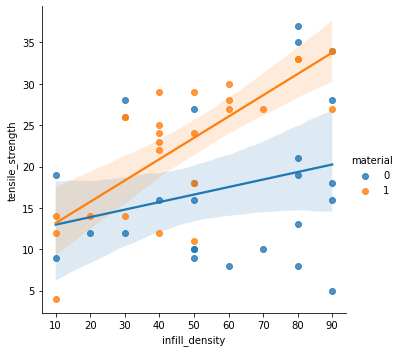

In [43]:
sns.lmplot(data=df1, x='infill_density', y='tensile_strength', hue='material');

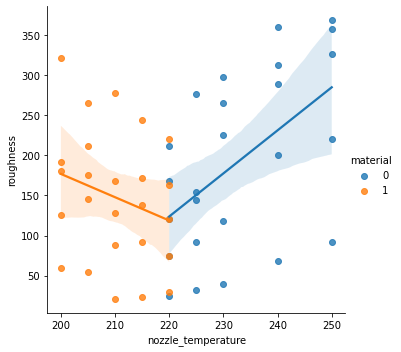

In [44]:
sns.lmplot(data=df1, x='nozzle_temperature', y='roughness', hue='material');

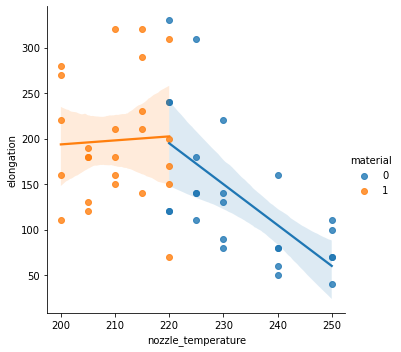

In [14]:
sns.lmplot(data=df1, x='nozzle_temperature', y='elongation', hue='material');

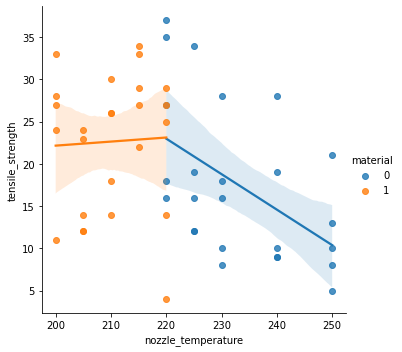

In [45]:
sns.lmplot(data=df1, x='nozzle_temperature', y='tensile_strength', hue='material');

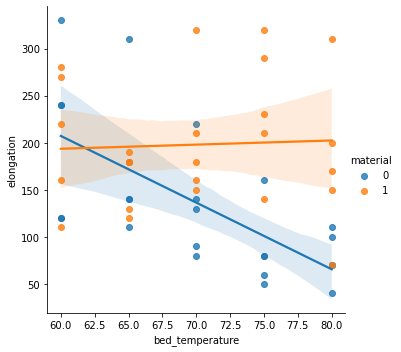

In [46]:
sns.lmplot(data=df1, x='bed_temperature', y='elongation', hue='material');

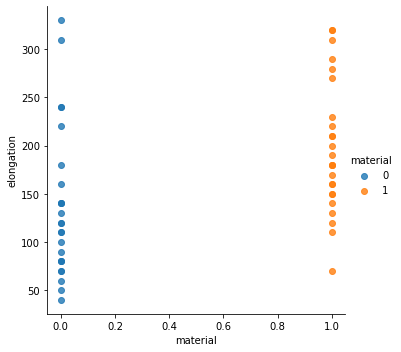

In [47]:
sns.lmplot(data=df1, x='material', y='elongation', hue='material');

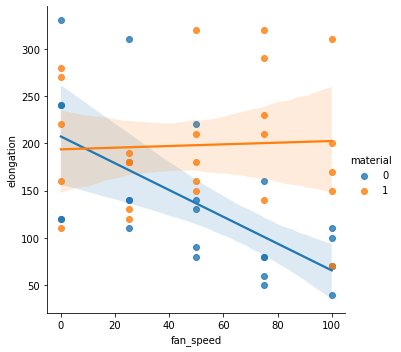

In [49]:
sns.lmplot(data=df1, x='fan_speed', y='elongation', hue='material');